## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [30]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [31]:
study_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [32]:
# Combine the data into a single dataset
mouse_merge = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")


In [33]:
# Display the data table for preview
mouse_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Checking the number of mice.
total_mice = len(mouse_metadata["Mouse ID"].unique())
total_mice

249

In [35]:
mouse_merge.duplicated(subset = ["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [36]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_IDs = mouse_merge.loc[mouse_merge.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_IDs

array(['g989'], dtype=object)

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_ID = mouse_merge.loc[mouse_merge["Mouse ID"] == "g989"]
mouse_duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_merge.drop_duplicates(subset=["Mouse ID"],)
cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [39]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data = len(cleaned_mouse_data["Mouse ID"].unique())
cleaned_mouse_data

249

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats = mouse_merge.groupby("Drug Regimen")

mean = tumor_stats["Tumor Volume (mm3)"].mean()
median = tumor_stats["Tumor Volume (mm3)"].median()
variance = tumor_stats["Tumor Volume (mm3)"].var()
standardDeviation = tumor_stats["Tumor Volume (mm3)"].std()
SEM = tumor_stats["Tumor Volume (mm3)"].sem()

tumorDF = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standardDeviation, "SEM": SEM})
tumorDF




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

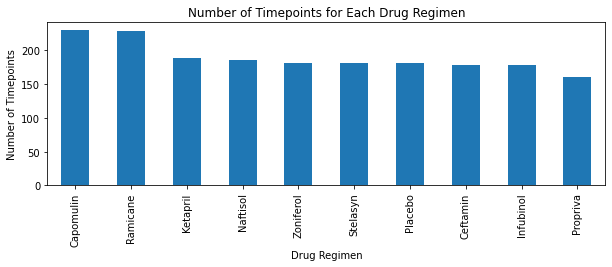

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barPlot = mouse_merge["Drug Regimen"].value_counts()
barPlot.plot(kind="bar", figsize=(10,3))

plt.title("Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")





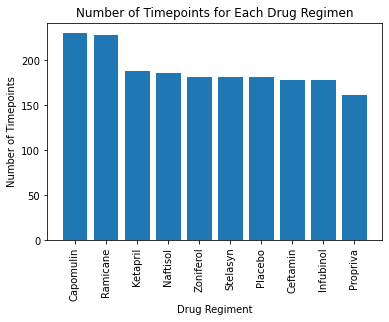

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints = mouse_merge["Drug Regimen"].value_counts()

x_axis = np.arange(len(timepoints))

plt.bar(x_axis, timepoints)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints.index.values)

plt.xticks(rotation=90)

plt.title("Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Timepoints")

plt.show()


Text(0, 0.5, '')

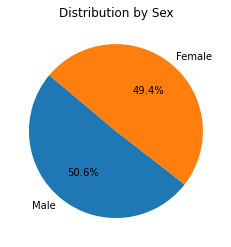

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

femaleVmale = mouse_merge["Sex"].value_counts()

piePlot = femaleVmale.plot.pie(autopct="%1.1f%%", startangle=140, title="Distribution by Sex")

piePlot.set_ylabel('')

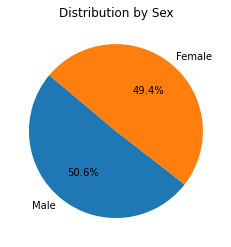

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
femaleVmale = mouse_merge["Sex"].value_counts()

plt.pie(femaleVmale, labels=femaleVmale.index.values, autopct="%1.1f%%", startangle=140)
plt.title("Distribution by Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepointDF = pd.DataFrame(mouse_merge.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Max_Timepoint"})
maxTimepointDF
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxTimepointMerge = pd.merge(mouse_merge, maxTimepointDF, on="Mouse ID")
maxTimepointMerge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max_Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVolData = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatmentDF = maxTimepointMerge.loc[maxTimepointMerge["Drug Regimen"] == treatment]
    
    # add subset 
    volumeDF = treatmentDF.loc[treatmentDF["Timepoint"] == treatmentDF["Max_Timepoint"]]
    
    volumes = volumeDF["Tumor Volume (mm3)"]
    TumorVolData.append(volumes)
    
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR for {treatment}: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    
    #outliers
    outliers = (volumes.loc[(volumeDF["Tumor Volume (mm3)"]>= upper_bound) | 
                            (volumeDF["Tumor Volume (mm3)"] <= lower_bound)]).count()
    
    print(f"Number of {treatment} outliers: {outliers}")
    
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


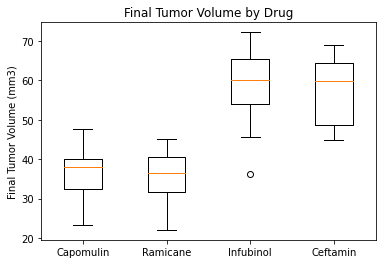

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(TumorVolData)

plt.title("Final Tumor Volume by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

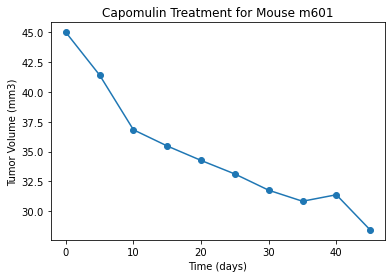

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
CapomulinPlot = mouse_merge.loc[mouse_merge["Mouse ID"] == "m601"]

plt.plot(CapomulinPlot["Timepoint"], CapomulinPlot["Tumor Volume (mm3)"], marker = "o")

plt.title("Capomulin Treatment for Mouse m601")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


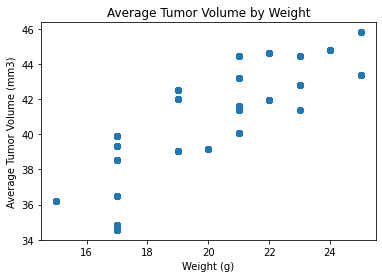

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ScatterCapomulin = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Capomulin"]

AvgTumorVol = pd.DataFrame(ScatterCapomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"})
AvgTumorVol = pd.merge(ScatterCapomulin, AvgTumorVol, on="Mouse ID")
AvgTumorVol

x_values = AvgTumorVol["Weight (g)"]
y_values = AvgTumorVol["Avg Tumor Volume"]

plt.scatter(x_values,y_values)

plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

                             


## Correlation and Regression

The correlation between weight and avg tumor volume for Capomulin is 0.83


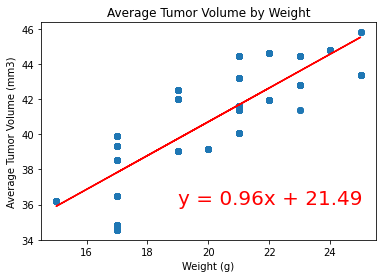

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ScatterCapomulin = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Capomulin"]

AvgTumorVol = pd.DataFrame(ScatterCapomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"})
AvgTumorVol = pd.merge(ScatterCapomulin, AvgTumorVol, on="Mouse ID")
AvgTumorVol

x_values = AvgTumorVol["Weight (g)"]
y_values = AvgTumorVol["Avg Tumor Volume"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between weight and avg tumor volume for Capomulin is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(19,36),fontsize=20,color="red")

plt.title("Average Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()